In [7]:
%matplotlib inline

import pandas as pd
from datetime import datetime

going_df = pd.read_pickle('going_df.p')

# transform seconds to minutes
going_df = going_df / 60
# change column names for clarity
going_df = going_df.rename(columns={'optimistic':'best_case', 'best_guess':'average', 'pessimistic':'worst_case'})

going_df.head()

,best_case,average,worst_case
2017-10-02 06:00:00,19.716667,23.000000,26.016667
2017-10-02 06:10:00,19.816667,23.983333,29.066667
2017-10-02 06:20:00,20.200000,24.933333,33.950000
2017-10-02 06:30:00,20.750000,25.733333,34.583333
2017-10-02 06:40:00,20.866667,25.650000,35.150000


Create df just for Monday data

In [8]:
monday_going_df = going_df[going_df.index < datetime(2017, 10, 3)]

Some sample plots

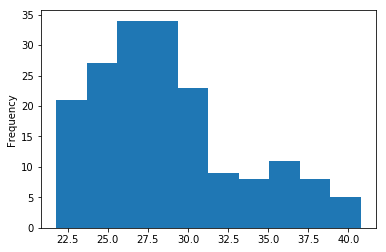

In [10]:
going_df['average'].plot.hist()

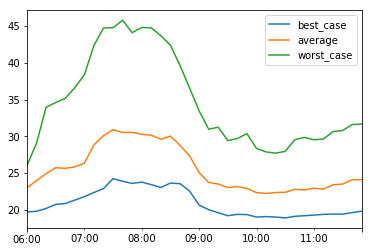

In [11]:
monday_going_df.plot(kind='line')